In [8]:
import torch
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import Dataset
from torch.utils.data import ConcatDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from skimage.transform import radon

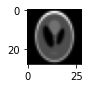

In [9]:
## image from skimage
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon,rescale,resize

image = shepp_logan_phantom()
image = resize(image, (28,28))
ny,nx = image.shape

plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
plt.show()

## Step1_Data from MNIST using torchvision.datasets

In [10]:
mnist_train_dataset = datasets.MNIST(root = './data', train = True, download = True)
mnist_test_dataset = datasets.MNIST(root = './data', train = False, download = True)
print(mnist_train_dataset.data.shape)

torch.Size([60000, 28, 28])


## Radon Matrix construction

In [11]:
# Radon Matrix exists for every angle and every line. matrix 
def getRadonMatrix(theta,ny,nx):
    colum_of_A = radon(np.zeros((ny,nx)), theta = theta) # this is only to know the size
    A = np.zeros((colum_of_A.size, nx*ny))
    for i in range(ny):
        for j in range(nx):
            basis_vec = np.zeros((ny,nx))
            basis_vec[i,j] = 1
            colum_of_A = radon(basis_vec, theta = theta)
            #print(colum_of_A.size)
            A[:,j+i*nx] = np.reshape(colum_of_A, colum_of_A.size)
    return A

In [12]:
nx, ny = 28, 28
## theta values for X ray incidence angles
theta = np.linspace(0,180,14,endpoint = True)
A = getRadonMatrix(theta, ny, nx)
#print(A.shape)

##  Sinogram and Noisy Sinogram vectors example

In [9]:
print(image.shape)
vec_img = np.reshape(image, A.shape[1])
print(vec_img.shape)
vec_sinogram = A@vec_img
print(vec_sinogram.shape)
noise_level = 0.01
vec_sinogram_noisy = vec_sinogram + noise_level*np.random.randn(vec_sinogram.size)
print(vec_sinogram_noisy.shape)

(28, 28)
(784,)
(392,)
(392,)


In [10]:
sinogram = radon(image, theta=theta)
print(sinogram.shape)

(28, 14)


In [11]:
## how do we get vec_img from knowning vec_sinogram_noisy only?

# first idea: this is essentially - knowning y = Ax, how do I get x? 
#Why not just min_x ||Ax-y||^2 (and pick the x with minimal norm among all possible solutions)?
# 
pseudo_inverse_of_A = np.linalg.pinv(A)
reconstruction_noisy = pseudo_inverse_of_A@vec_sinogram_noisy   
reconstruction = pseudo_inverse_of_A@vec_sinogram
# computes the least squares (minimal norm) estimate as suggested above

## figure of (2,3) plottings in matplotlib

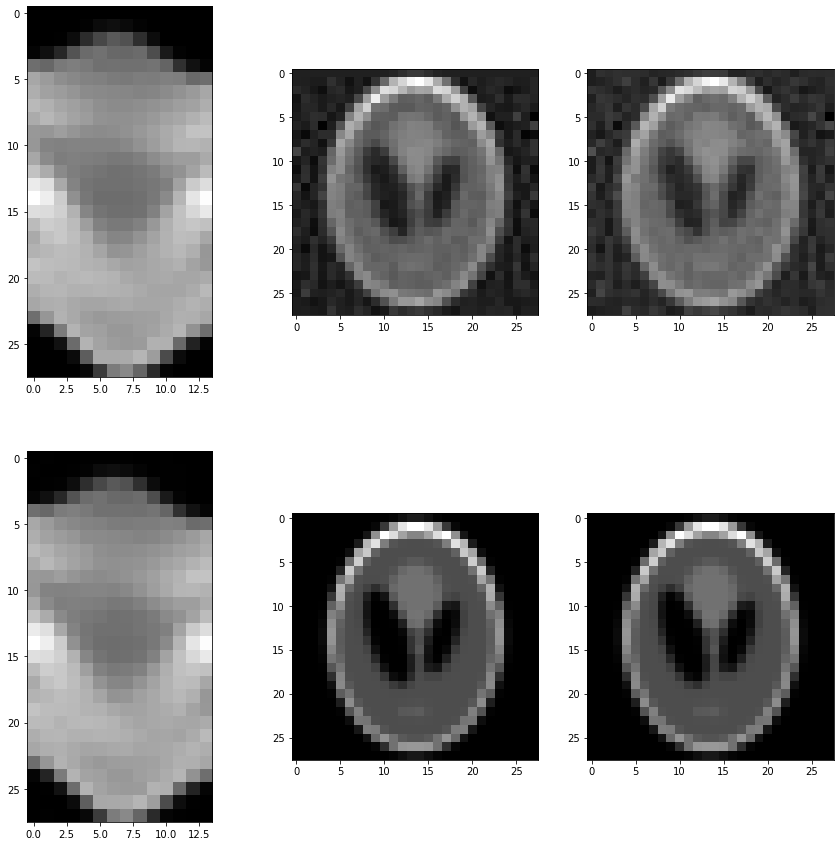

In [12]:
f, axis = plt.subplots(2, 3)
f.set_figheight(15)
f.set_figwidth(15)
axis[0,0].imshow(np.reshape(vec_sinogram, sinogram.shape), cmap='gray')
axis[1,0].imshow(np.reshape(vec_sinogram_noisy, sinogram.shape), cmap='gray')

axis[0,1].imshow(np.reshape(reconstruction, (ny,nx)), cmap='gray')
axis[1,1].imshow(image, cmap='gray')

axis[0,2].imshow(np.reshape(reconstruction_noisy, (ny,nx)), cmap='gray')
axis[1,2].imshow(image, cmap='gray')

plt.show()